<a href="https://colab.research.google.com/github/SurekhaBerlin/Python/blob/main/Churn_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Telecom Customer Churn**

> Predicting Telecom Customer Churn and Conducting a case study of the Analysis is the purpose of this assignment




In [216]:
# Importing all required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [217]:
# Reading the data
## import telecom dataset into a pandas data frame

telco_base_data = pd.read_csv("/content/Customer-Churn.csv")

In [218]:
## visualize column names
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [219]:
# check unique values of each column
for column in telco_base_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, telco_base_data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [220]:
# Check the descriptive statistics of numeric variables

telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 telco_base_data.describe() method to find the descriptive statistics (mean, median, maximum, minimum, standard deviation, count, etc.) of the data frame.

In [221]:
# Data Wrangling
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
telco_base_data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [223]:
#Check the distribution of the target variable now
telco_base_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The data shows that there are a lot of loyal customers who does not churn meaning they are not leaving the telecom service provider to switch to the competitor service provider. So we analyze the data with other features while taking the target values separately to get some insights.

In [224]:
# Summary of the data frame
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see our data consist of 7043 rows and 21 columns which makes it quite small dataset. The variables are in an object type except for SeniorCitizen , tenure are both int64 and MonthlyCharges has a float64 type.if needed we can change the datatypes (e.g. the column Total Charges is identified as an object or string type data but it is actually a float type data, so we will have to change it) to perform relevant operations.

# **Data Cleaning**

we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. By default, this function raises an exception when it sees non-numeric data; however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [225]:
#Changing the datatype
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges,errors= 'coerce')

To change the datatype of  the column Total Charges identified as an object type data which is actually a float type data. We are changing it to float type to perform relevant operations.

In [226]:
#Checking the datatype of TotalCharges
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [227]:
#Check whether there are any missing values present in the data frame.
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In Total charges there are 11 null values among the 7043 data

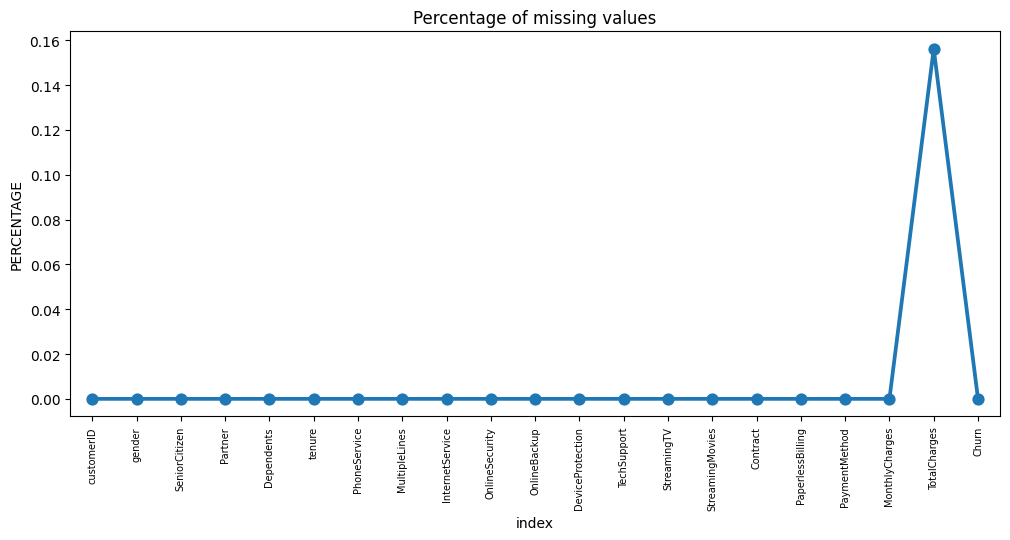

In [228]:
# Using a plot to show the percentage of missing values

missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize = (12,5))
ax = sns.pointplot(x = 'index', y = 0,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [229]:
#Length of the dataset before removing the missing values
len(telco_base_data)

7043

**Missing Value Treatment**

*   Since the percentage of these records compared to the total dataset is very low i.e. 0.15% it is safe to ignore them or drop them from further processing
*   Incase you want to treat them, you can use mean() or median() to treat them  


In [230]:
#Removing null/missing values
telco_base_data.dropna(how = 'any', inplace = True)

In [231]:
#Checking if the null/missing values are removed
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [232]:
#length of the dataset after removing the missing values
len(telco_base_data)

7032

In [233]:
# Data Wrangling
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**DATA PREPARATION**


Divide the Tenure

* Divide the data into bins based on tenure for eg tenure<12months, assume a tenure group of 0-12 and then 12-24 and so on....*








In [234]:
#Finding the minimum value of the tenure
telco_base_data.tenure.min()


1

In [235]:
#Finding the maximum value of the tenure
telco_base_data.tenure.max()

72

In [236]:
#Check the distribution of the tenure variable now
telco_base_data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

**Group the tenure to bins**

There are time-based variables like age or tenure or something measured in terms of weeks, months, or years it is better for variables that need to be converted into various bins like the one below so they can be categorized well. For example, in this case, we have the tenure variable, so we divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group of 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on.

In [237]:
# Group the tenure into bins of 12 months

labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure,range(1,80,12),right = False , labels = labels)

In [238]:
#Check the distribution of the tenure_group variable now
telco_base_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**Remove unnecessary Variables**

A clean data set is very important so, it is better to remove irrelevant variables like tenure (we divided them into bins) and customerID. These operations help us to create a clean dataset.

The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.

In [239]:
# Removing unnecessary variables from the dataset
telco_base_data.drop(columns = ['customerID','tenure'],inplace = True)

**Payment method denominations**


Some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.



In [240]:
# unique elements of the PaymentMethod column
telco_base_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [241]:
# remove (automatic) from payment method names
telco_base_data['PaymentMethod'] = telco_base_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)


In [242]:
# unique elements of the PaymentMethod column after the modification
telco_base_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

**DATA VISUALIZATION**

**EXPLORATORY DATA ANALYSIS - EDA**


**Categorical Univarite Analysis**


*  To observe the influence of various features on the effect of churning.

*  We use histograms to evaluate the influence of each independent numeric variable in the outcome.


*  If the data set is imbalanced; therefore, we need to draw a probability density function of each class (density=True) to be able to compare both distributions properly.




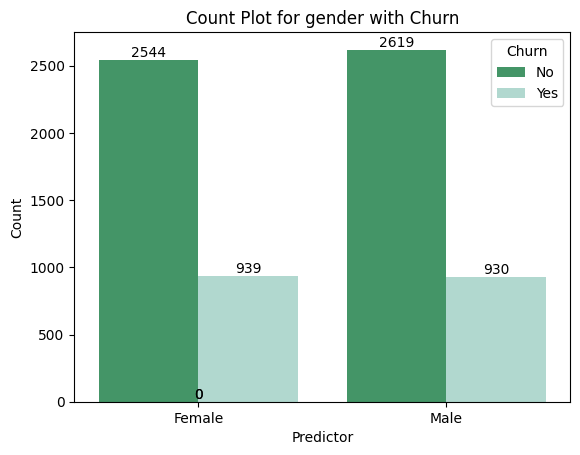

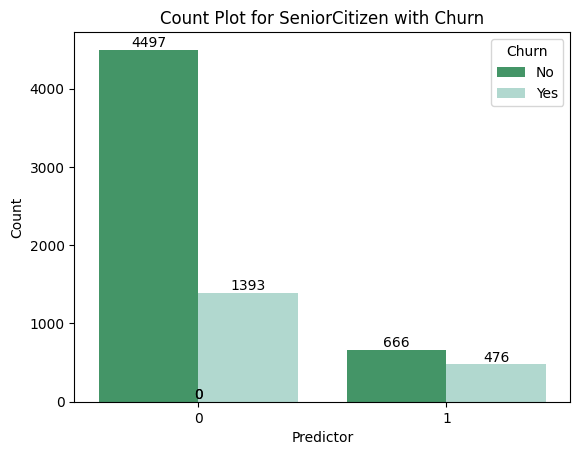

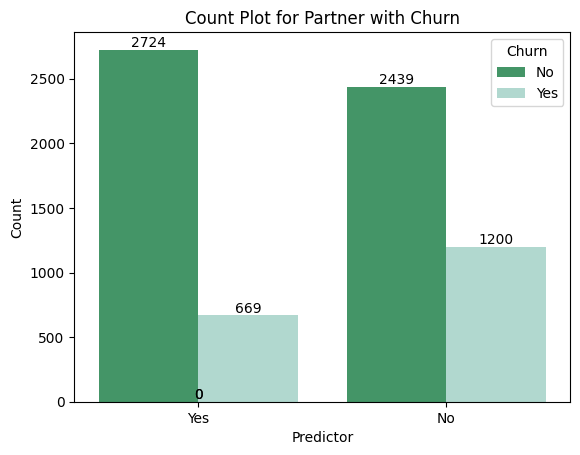

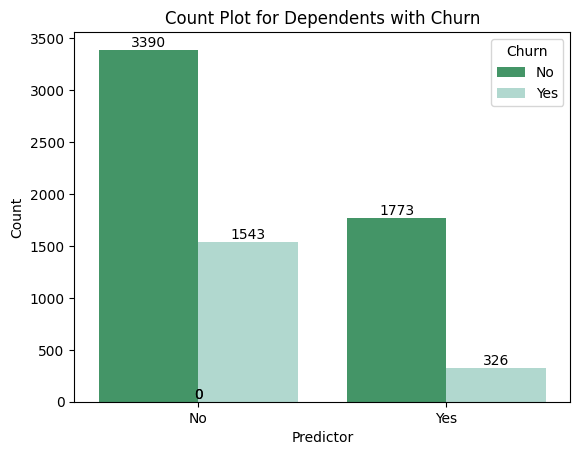

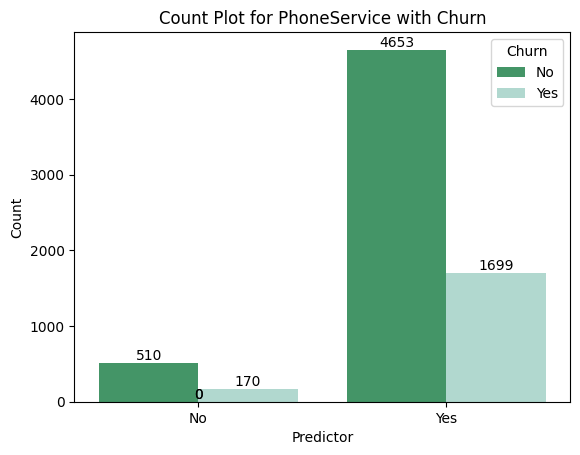

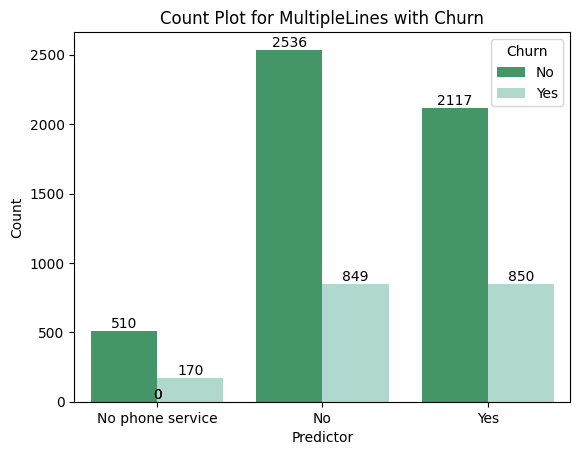

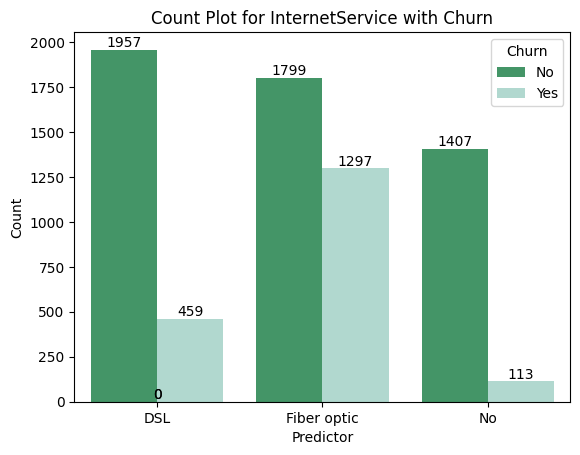

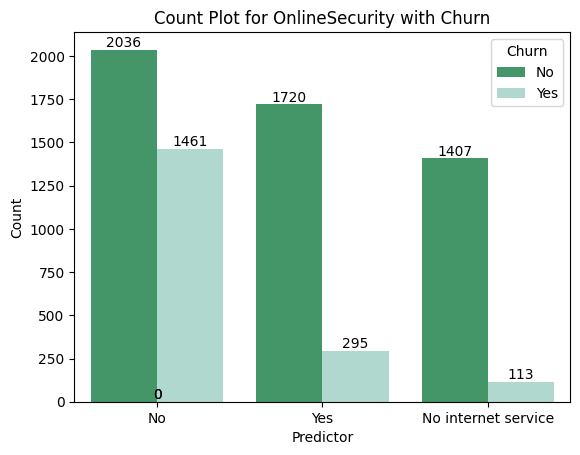

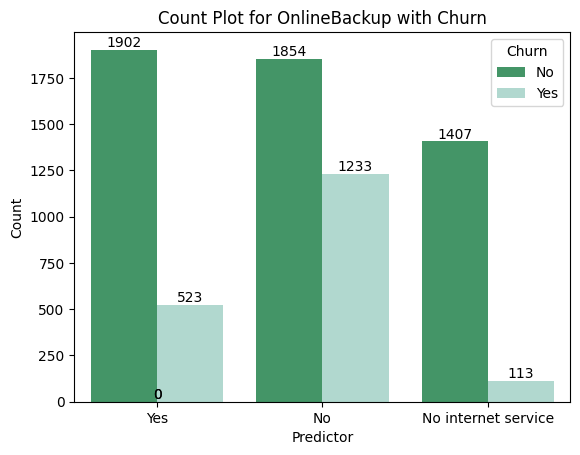

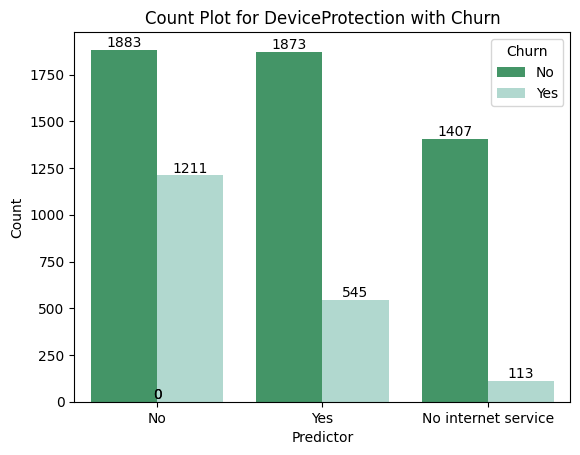

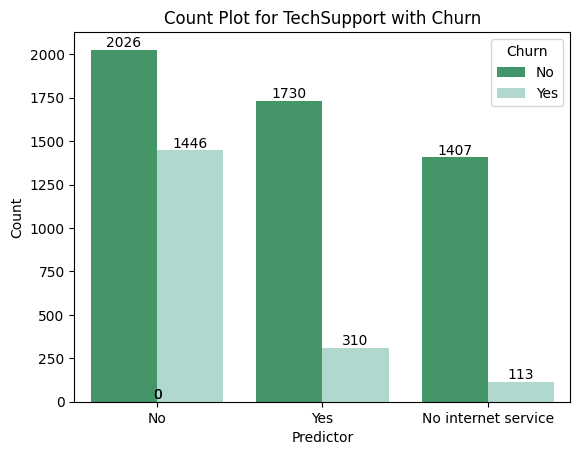

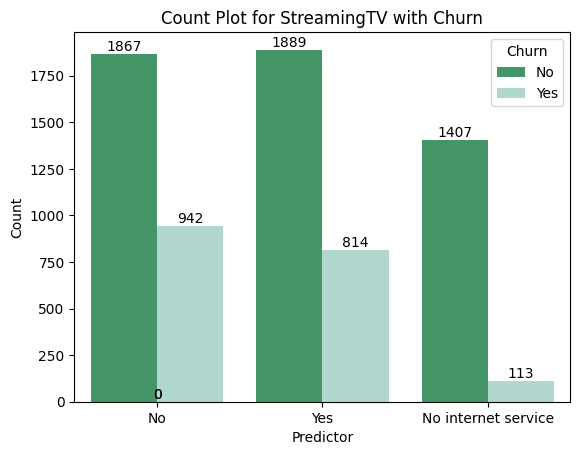

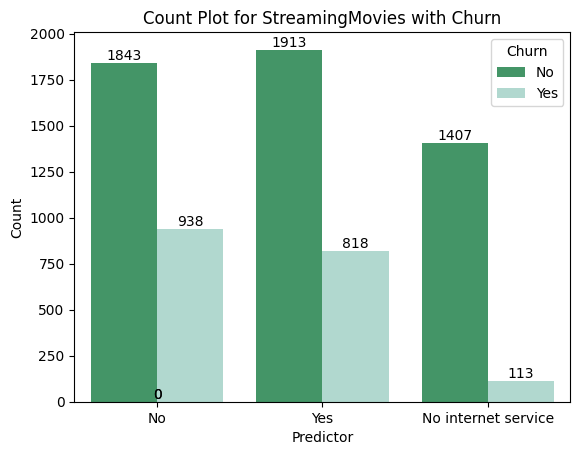

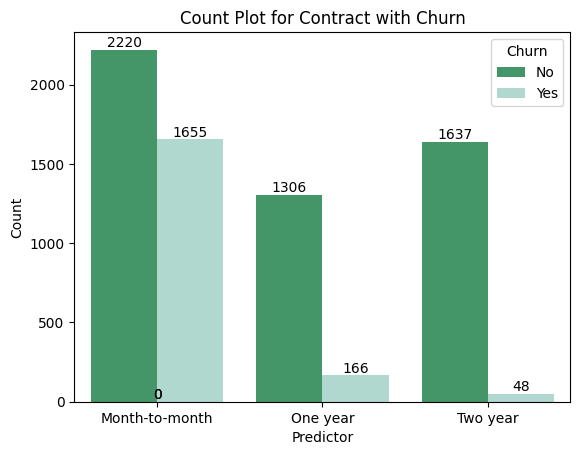

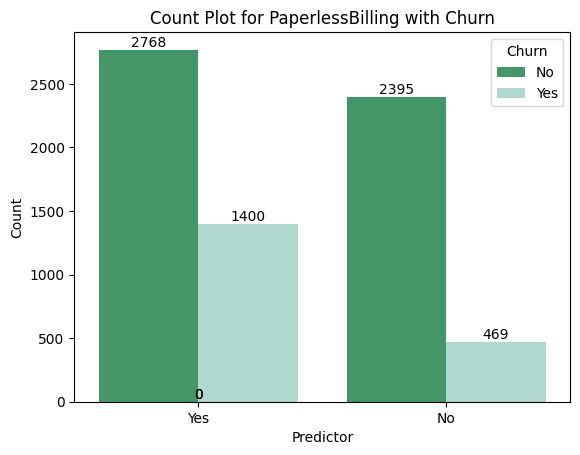

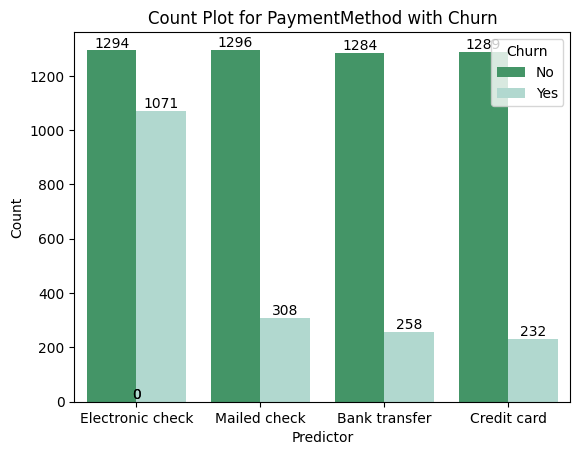

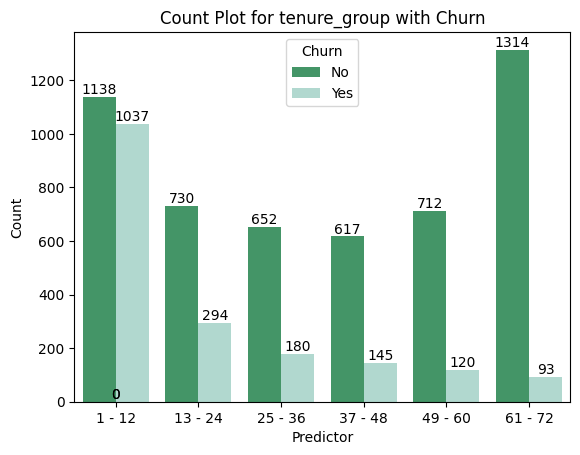

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through the predictors and create count plots with labels
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=telco_base_data, x=predictor,palette= 'BuGn_r',  hue='Churn')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    ax.set_xlabel('Predictor')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_title('Count Plot for ' + predictor + ' with Churn')  # Set plot title
    plt.show()


Numerical Univariate Analysis


**DATA VISUALIZATION**


> Data Visualization will give better insights into the relationship between variables, distribution of the certain variables on the graph, etc. I have tried to use  correlation plots, heatmaps, univariate, and bivariate plots.

Text(0.5, 1.0, 'Monthly Charges by Churn')

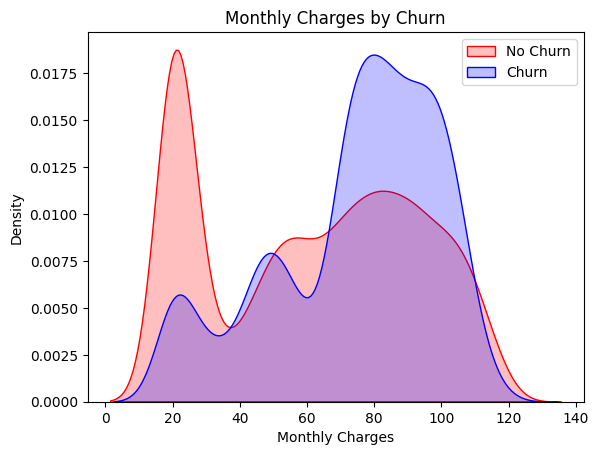

In [244]:
#Data visualization using
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color = 'Red', fill ="True")
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color = 'Blue', fill ="True")
MonthlyCharges.legend(labels =['No Churn','Churn'], loc = 'upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title("Monthly Charges by Churn")

From the graph it is clear that if the monthly charges are more the churn rate is higher

Text(0.5, 1.0, 'Total Charges by Churn')

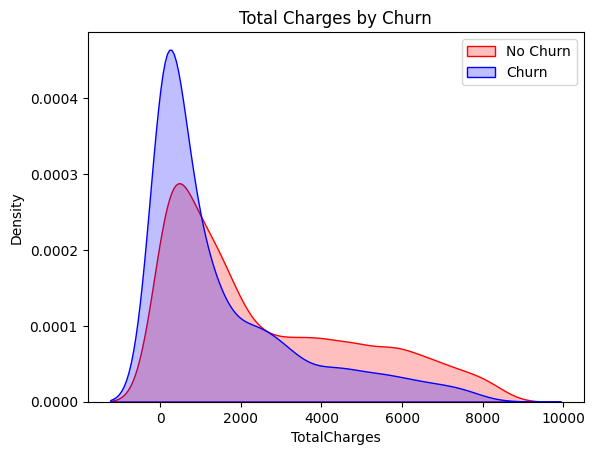

In [245]:
#Data visualization using plots
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color = 'Red', fill ="True")
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color = 'Blue', fill ="True")
TotalCharges.legend(labels =['No Churn','Churn'], loc = 'upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('TotalCharges')
TotalCharges.set_title('Total Charges by Churn')

From the graph we can see that if the total charges are less the churn rate is high

In [246]:
# Correlation of Monthly charges and Total charges
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges)
# ~ +1 -------> Positive Correlation
# ~ -1 -------> Negative Correlation
# ~ 0 -------> No or Less Correlation

0.6510648032262027

In [247]:
telco_dummies = pd.get_dummies(telco_base_data)
telco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


In [248]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == 'Yes' , 1, 0)

Categorical Data to Numerical Data

In [249]:
telco_dummies = pd.get_dummies(telco_base_data)
telco_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**CORRELATION PLOT**


> Plotting the correlation plot of the entire data w.r.t Churn

<Axes: >

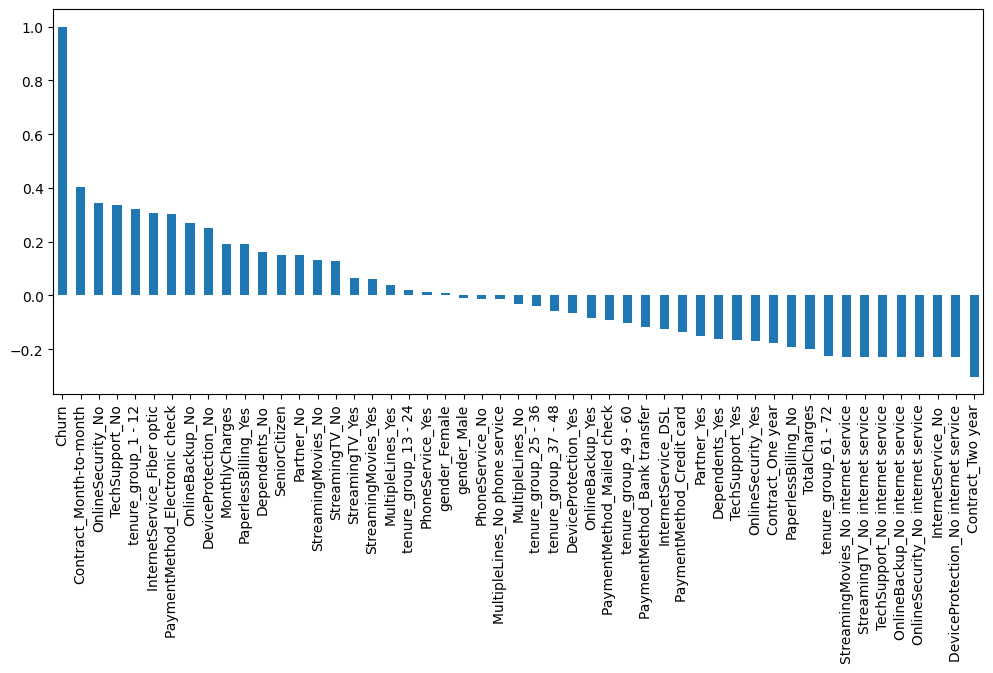

In [250]:
#Build a correlation of all predictors with ‘Churn’
plt.figure(figsize = (12,5))

telco_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

From the above graph, we can observe that.

1. HIGH Churn is seen in the case of Month to month contracts, No online security, No Tech support, First year of subscription, and Fibre Optics Internet

2. LOW Churn is seen in the case of Long term contracts, Subscriptions without internet service, and The customers engaged for 5+ years

3. Factors like Gender, Availability of PhoneService, and # of multiple lines have almost NO impact on Churn

**BIVARIATE ANALYSIS**

In [271]:
# column Senior_Citizen
telco_base_data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [251]:
new_df1_target0=telco_base_data.loc[telco_base_data["Churn"]==0]
new_df1_target1=telco_base_data.loc[telco_base_data["Churn"]==1]

In [252]:
def uniplot(df,col,title,hue =None):
    # Size of the graph
    plt.figure(figsize=(10,6))
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='BuGn_r')
    # Adjust the size of the hue
    if hue:
      ax.legend(fontsize = 'small')

    plt.show()

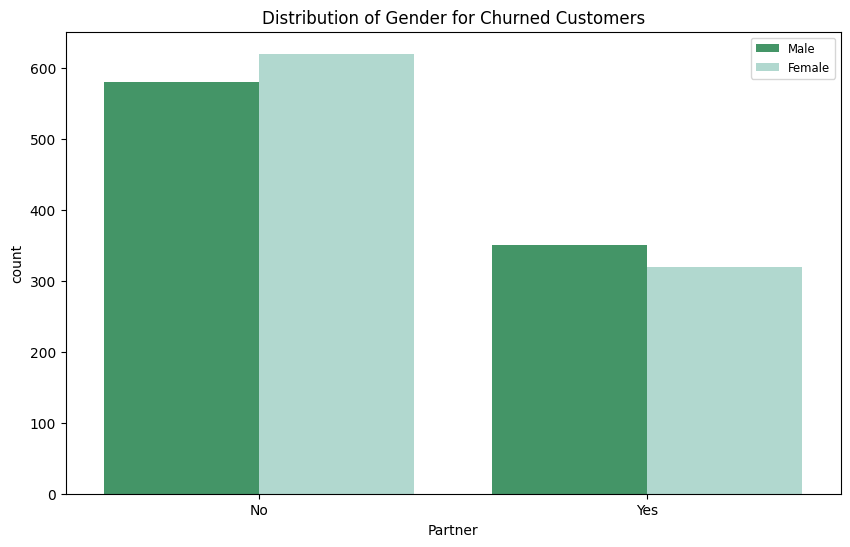

In [253]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

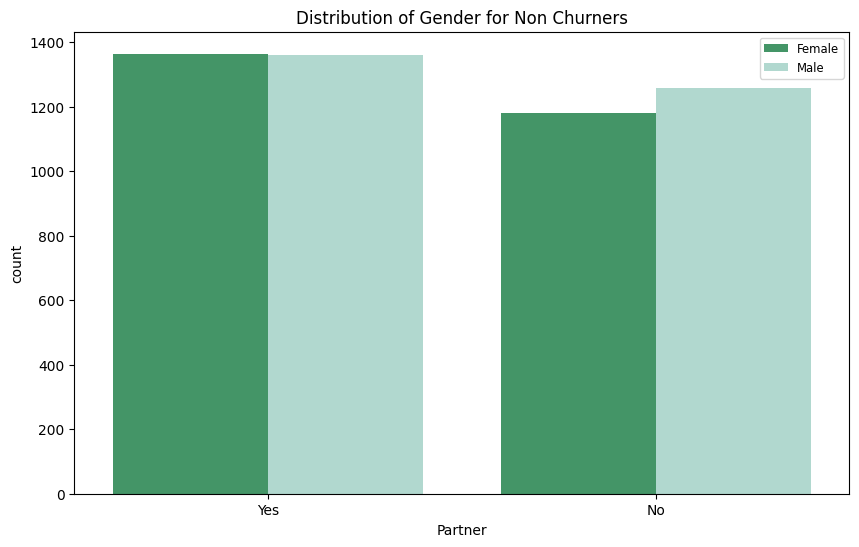

In [254]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churners',hue='gender')

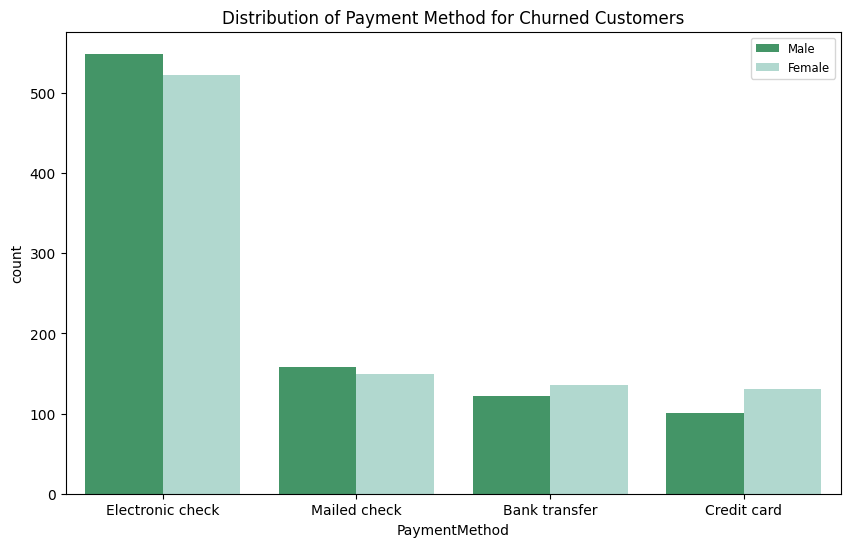

In [255]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')

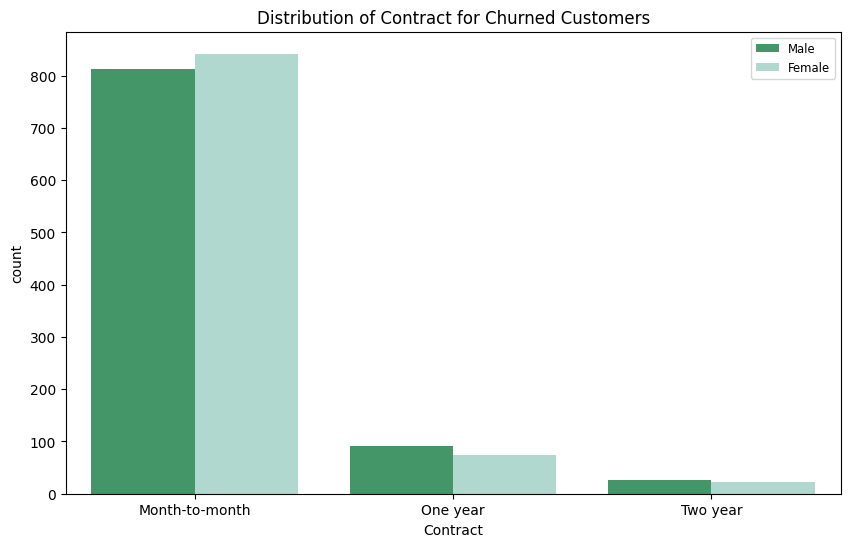

In [256]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

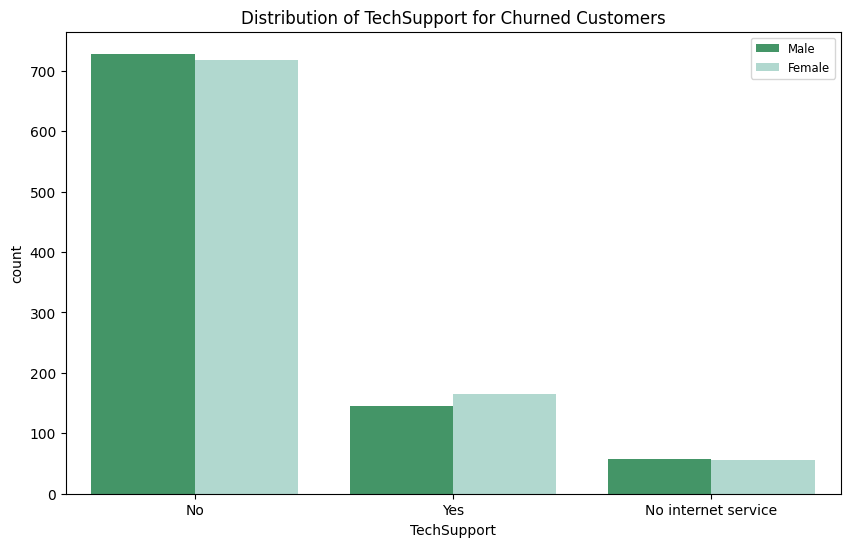

In [257]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

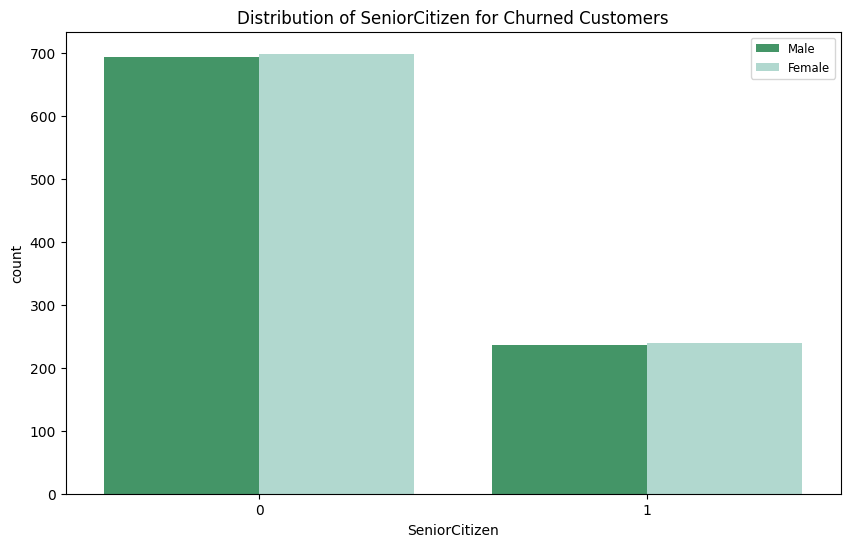

In [258]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

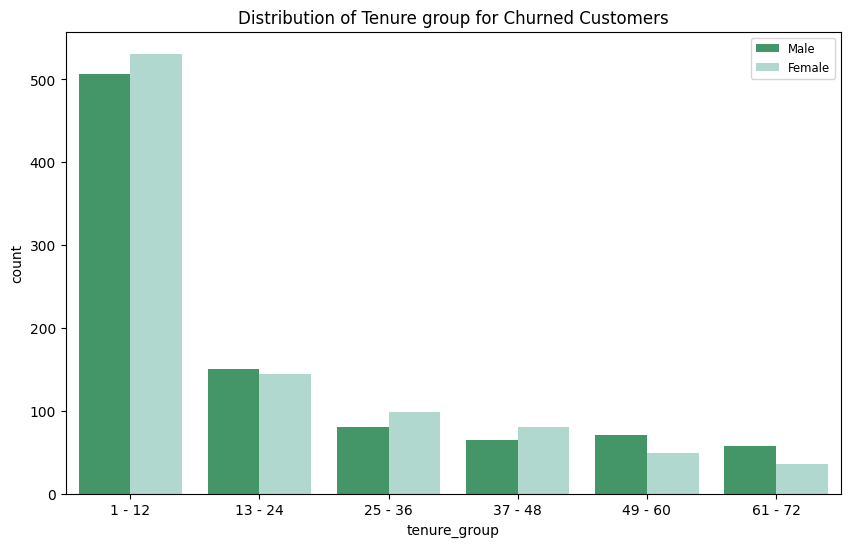

In [259]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure group for Churned Customers',hue='gender')

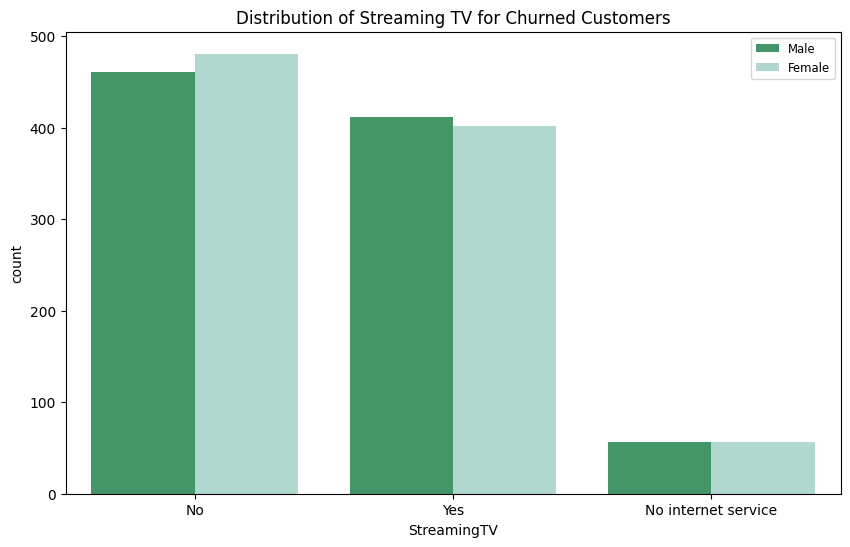

In [260]:
uniplot(new_df1_target1,col='StreamingTV',title='Distribution of Streaming TV for Churned Customers',hue='gender')

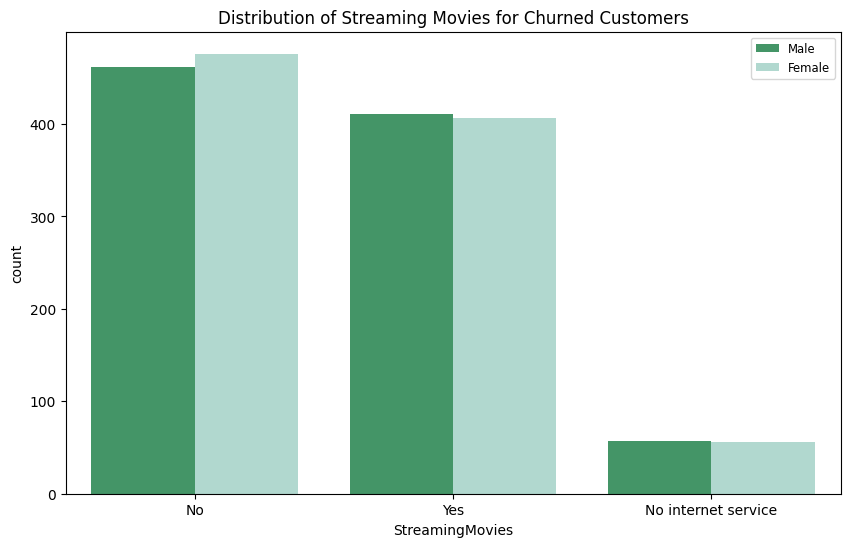

In [261]:
uniplot(new_df1_target1,col='StreamingMovies',title='Distribution of Streaming Movies for Churned Customers',hue='gender')

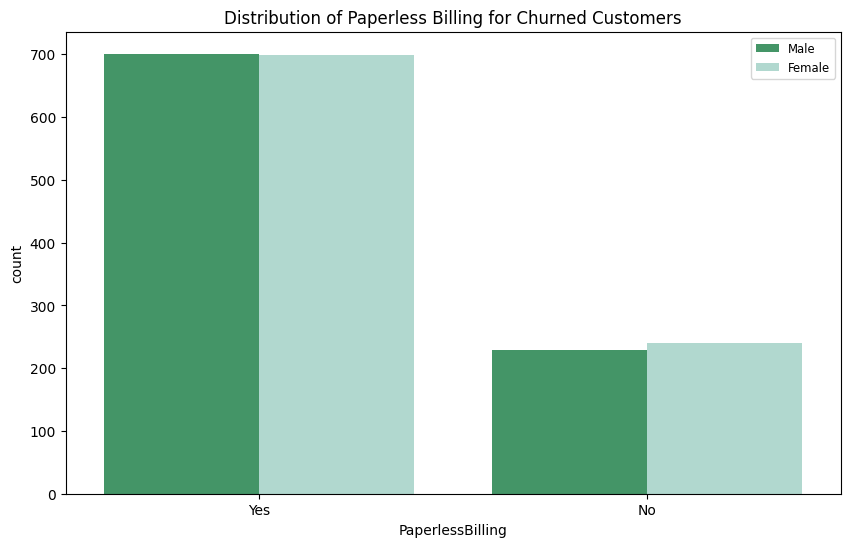

In [262]:
uniplot(new_df1_target1,col='PaperlessBilling',title='Distribution of Paperless Billing for Churned Customers',hue='gender')

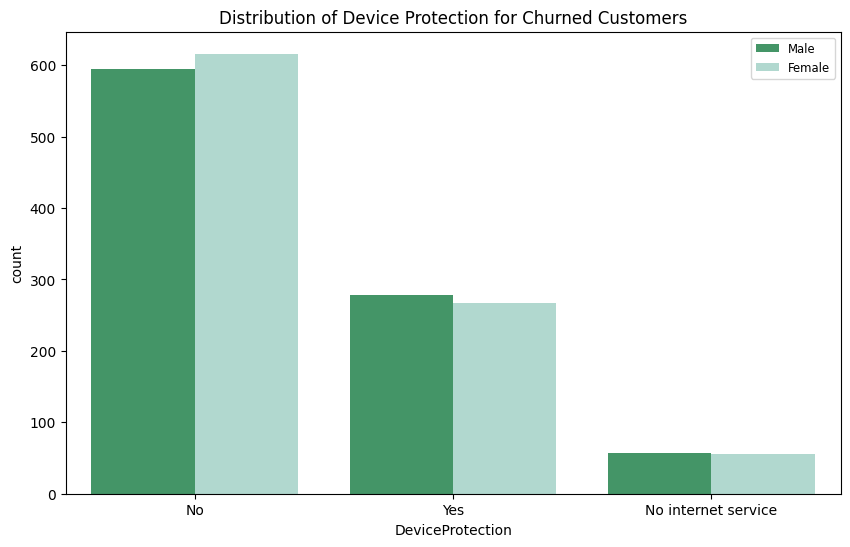

In [263]:
uniplot(new_df1_target1,col='DeviceProtection',title='Distribution of Device Protection for Churned Customers',hue='gender')

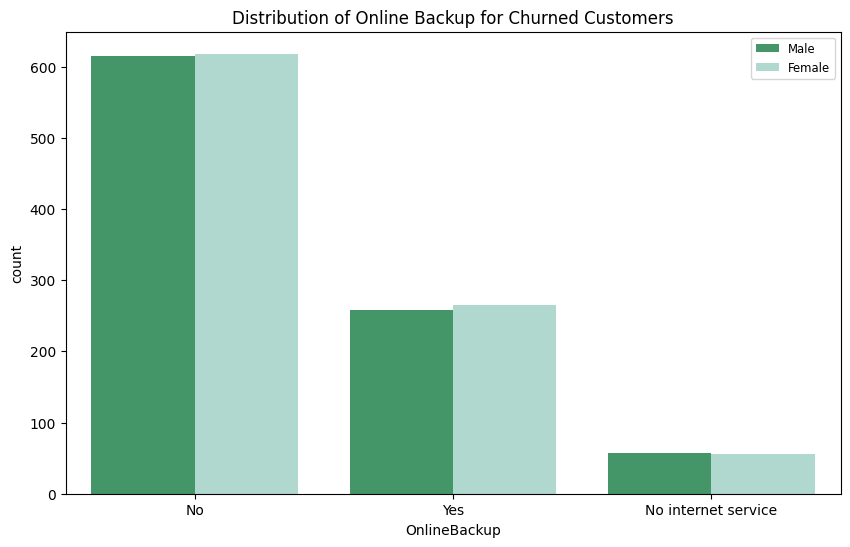

In [264]:
uniplot(new_df1_target1,col='OnlineBackup',title='Distribution of Online Backup for Churned Customers',hue='gender')

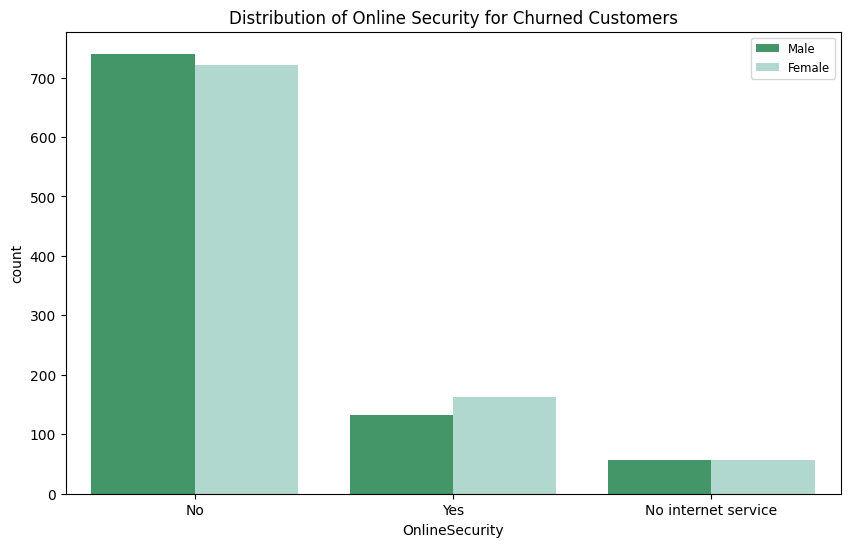

In [265]:
uniplot(new_df1_target1,col='OnlineSecurity',title='Distribution of Online Security for Churned Customers',hue='gender')

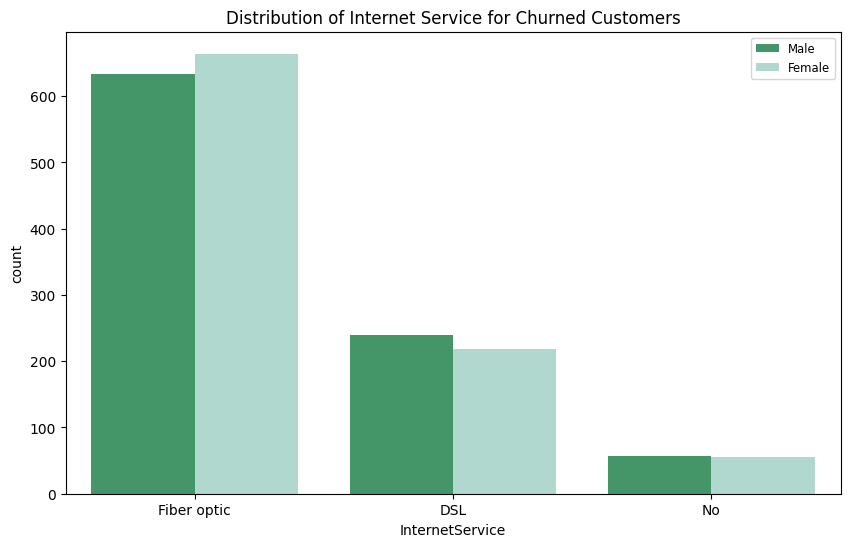

In [266]:
uniplot(new_df1_target1,col='InternetService',title='Distribution of Internet Service for Churned Customers',hue='gender')

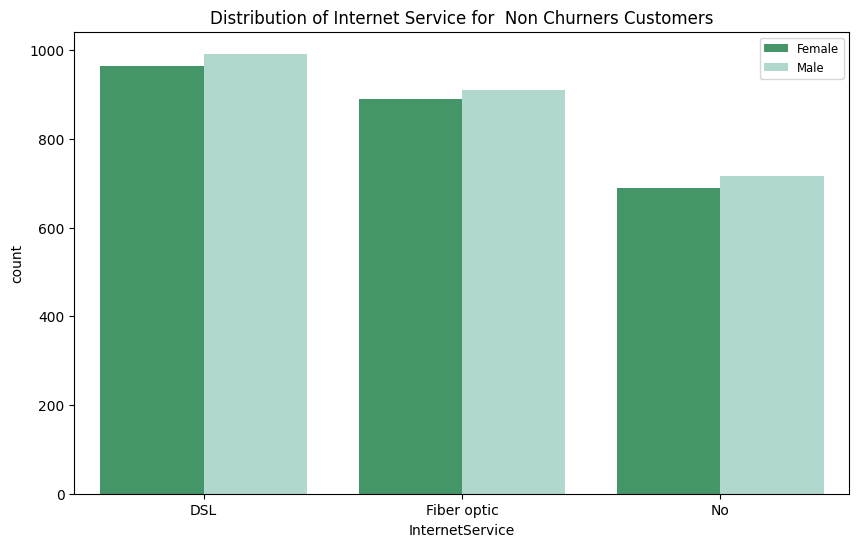

In [267]:
uniplot(new_df1_target0,col='InternetService',title='Distribution of Internet Service for  Non Churners Customers',hue='gender')